## Loading libraries

In [ ]:
# importing pandas
import pandas as pd

# Import numpy
import numpy as np

# Import math
import math

# Import matplotlib
import matplotlib.pyplot as plt

# Import seaborn
import seaborn as sns

# Importt scipy.stat
import scipy.stats as stats

# importing norm from scipy stats
from scipy.stats import norm

## loading data

In [ ]:
# loading the data
# url = https://drive.google.com/file/d/1ODcSRSs_isRKCAShFwnMrXdcphed9kYn/view
# Specifying url
url = 'https://drive.google.com/file/d/1ODcSRSs_isRKCAShFwnMrXdcphed9kYn/view'

# Spliting url
url='https://drive.google.com/uc?id=' + url.split('/')[-2]

# Loading data
moringa_student_heights = pd.read_csv(url)

## Preview data

In [ ]:
# Determining the no. of records in our dataset
moringa_student_heights.shape

(10000, 2)

In [ ]:
# Previewing the top of our dataset
moringa_student_heights.head()

,gender,ht
0,F,55.398043
1,F,64.975468
2,F,70.591667
3,F,63.574479
4,F,62.535298


In [ ]:
# Previewing the bottom of our dataset
moringa_student_heights.tail()

,gender,ht
9995,M,91.485240
9996,M,94.842755
9997,M,98.096696
9998,M,91.478957
9999,M,88.849197


In [ ]:
# Checking whether each column has an appropriate datatype
moringa_student_heights.dtypes

gender     object
ht        float64
dtype: object

- Data types for all columns are appropriate

## External data source verification

## Cleaning data

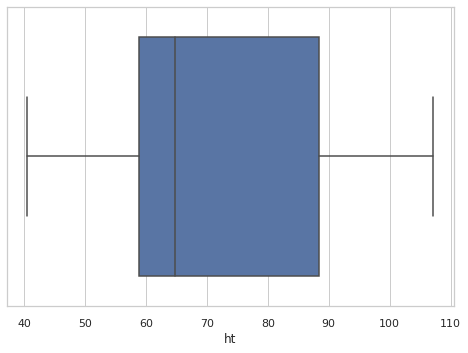

In [ ]:
# Checking for outliers
import seaborn as sns
sns.set_theme(style="whitegrid")
ax = sns.boxplot(x=moringa_student_heights['ht'])

- No outliers in the dataset

In [ ]:
# Checking for Anomalies

q1_3, q3_3 = np.percentile(moringa_student_heights['ht'], [25, 75]) 

iqr = q3_3 - q1_3

l_bound = q1_3 - (1.5*iqr)
u_bound = q3_3 + (1.5 * iqr)


print(iqr)

29.529585679652897


- No anomalies

In [ ]:
# Checking for null values
moringa_student_heights.isnull().sum()

gender    0
ht        0
dtype: int64

- No null values

In [ ]:
# Checking for duplicates
moringa_student_heights.duplicated().sum()

0

- No duplicates in the dataset

- **Data set is clean**


## Sampling data

In [ ]:
# Determine propotions of males to females in the moringa students height dataframe
moringa_student_heights['gender'].describe()

count     10000
unique        2
top           F
freq       6000
Name: gender, dtype: object

In [ ]:
# Randomly samplying data
moringa_sample = moringa_student_heights.groupby('gender', group_keys=False).apply(lambda x: x.sample(frac=0.005))
moringa_sample['gender'].describe()

count     50
unique     2
top        F
freq      30
Name: gender, dtype: object

- The data has been sampled in the right propotion

In [ ]:
# Data frame with male data only
sample_moringa_males = moringa_sample.loc[moringa_sample['gender'] == 'M']

# Data frame with female data only
sample_moringa_females = moringa_sample.loc[moringa_sample['gender'] == 'F']

## Clarify steps and assumptions

**Assumptions**:
- Data is normally distributed
- 

**Steps**:
- Specifying the Null Hypothesis
- Specifying the Alternative Hypothesis
- Setting the Significance Level (a)
- Calculating the Test Statistic and Corresponding P-Value
- Drawing a Conclusion

## Hypothesis testing

**1. Claim that average height of Kenyan women is probably around 4 feet 7 inches**

In [ ]:
# Shape of dataframe with only female data
sample_moringa_females.shape

(30, 2)

In [ ]:
# Null hypothesis Ho, µ = 55 inches
# Alternate hypothesis H1, µ ≠ 55 inches
# Significance level α = 0.05
# n = number_female

# Specify variables
α = 0.05
n = 30
population_mean = 55

# determining t_statistic and p_value
stats.ttest_1samp(sample_moringa_females['ht'], population_mean)

Ttest_1sampResult(statistic=4.3592534050285945, pvalue=0.00014970730582726538)

**Z test**

In [ ]:
# Mean of female heights
mean = sample_moringa_females['ht'].mean()
mean
import statistics
sd = statistics.stdev(sample_moringa_females['ht'])
sd
# Calculating t statistic
z_score = (mean - population_mean) / sd
z_score
stats.norm.sf(abs(z_score)) * 2

0.42609763584451266

**2. Claim 2 average height of kenyan men is 169.6 cm, or 5 feet, 7 inches**


In [ ]:
# Null hypothesis Ho, µ = 66.772 inches
# Alternate hypothesis H1, µ ≠ 66.772 inches
# Significance level α = 0.05
# n = number of males

# Specify variables
α = 0.05
n = 20
population_mean = 66.772

# determining t_statistic and p_value
stats.ttest_1samp(sample_moringa_males['ht'], population_mean)

Ttest_1sampResult(statistic=21.549694277970044, pvalue=8.166832208625197e-15)

**Claim 3 Are males taller than females in humans**

In [ ]:
# Null hypothesis Ho, males are not taller than females
# Alternate hypothesis H1 males are taller than females (claim)
# Significance level α = 0.05
# n = number of males

# Specify variables
α = 0.05
n = 50

# p value assuming equal varaince
stats.ttest_ind(sample_moringa_females['ht'], sample_moringa_males['ht'], equal_var=True)

Ttest_indResult(statistic=-20.412132410679607, pvalue=2.6326373731256783e-25)

**4. Determine values in 95% confidence interval**

In [ ]:
# significance level = 5%
alpha = 0.05 
# sample sizes                                                  
n1, n2 = len(sample_moringa_females['ht']), len(sample_moringa_males['ht'])  
# pooled standard deviation                                
s1, s2 = np.var(sample_moringa_females['ht'], ddof=1), np.var(sample_moringa_males['ht'], ddof=1)  
# sample variances
s = np.sqrt(((n1 - 1) * s1 + (n2 - 1) * s2) / (n1 + n2 - 2)) 
# degrees of freedom
df = n1 + n2 - 2 
# t-critical value for 95% CI                                            
t = stats.t.ppf(1 - alpha/2, df)                             

lower = (np.mean(sample_moringa_males['ht']) - np.mean(sample_moringa_females['ht'])) - t * np.sqrt(1 / len(sample_moringa_males['ht']) + 1 / len(sample_moringa_females['ht'])) * s
upper = (np.mean(sample_moringa_males['ht']) - np.mean(sample_moringa_females['ht'])) + t * np.sqrt(1 / len(sample_moringa_males['ht']) + 1 / len(sample_moringa_females['ht'])) * s

print(f'lower limit {lower} and upper limit {upper}')

lower limit 26.152535167167844 and upper limit 31.867634787163336


In [ ]:
xa = sample_moringa_females['ht'].to_numpy()
xa

array([63.30973115, 57.75963095, 64.29982781, 57.59153172, 53.96180109,
       57.84236065, 52.67275823, 56.55685868, 67.76943341, 61.35726977,
       62.73171706, 65.05099011, 61.65151575, 56.61821645, 59.39158856,
       53.4198886 , 56.4764665 , 62.35549557, 52.5392586 , 62.60280052,
       52.7406451 , 59.26149051, 61.82728408, 49.60248408, 74.42875459,
       57.6733688 , 62.48712898, 54.34730538, 56.27305835, 59.9453432 ])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: RuntimeWarning: divide by zero encountered in double_scalars
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: RuntimeWarning: invalid value encountered in true_divide
  


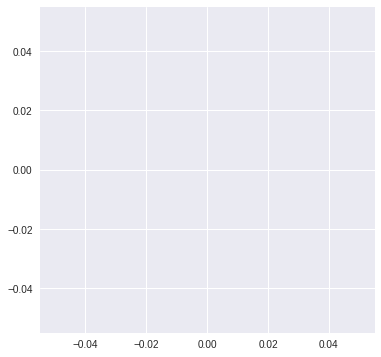

In [ ]:
# A custom function to calculate
# probability distribution function
def pdf(xa):
    mean = np.mean(xa)
    std = np.std(xa)
    y_out = 1/(std * np.sqrt(2 * np.pi)) * np.exp( - (xa - mean)**2 / (2 * std**2))
    return y_out
    
# To generate an array of x-values
x = np.arange(26.78309313756948, 32.631813346708256, 29.707453242138868)
  
# To generate an array of
# y-values using corresponding x-values
y = pdf(x)
  
# Plotting the bell-shaped curve
plt.style.use('seaborn')
plt.figure(figsize = (6, 6))
plt.plot(x, y, color = 'black',
         linestyle = 'dashed')
  
plt.scatter( x, y, marker = 'o', s = 25, color = 'red')
plt.show()

univariate and Bivariate Analysis(plotting graphs)